In [1]:
from pathlib import Path
paths = list(Path("/workspace/data/original_data/atmaCup#18_dataset/images").glob("*/image_t.png"))

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import gc
from PIL import Image
import requests
from transformers import pipeline


def show_mask(mask, ax, random_color=False):
    if random_color:
        color = np.concatenate([np.random.random(3), np.array([0.6])], axis=0)
    else:
        color = np.array([30 / 255, 144 / 255, 255 / 255, 0.6])
    h, w = mask.shape[-2:]
    mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)
    ax.imshow(mask_image)
    del mask
    gc.collect()

def show_masks_on_image(raw_image, masks):
    plt.imshow(np.array(raw_image))
    ax = plt.gca()
    ax.set_autoscale_on(False)
    for mask in masks:
        show_mask(mask, ax=ax, random_color=True)
    plt.axis("off")
    plt.show()
    del mask
    gc.collect()


# generator = pipeline("image-segmentation", model="nvidia/segformer-b1-finetuned-cityscapes-1024-1024", device=0)
# generator = pipeline(model="nvidia/mit-b5", device=0)
# generator = pipeline(model="facebook/detr-resnet-50-panoptic", device=0)
generator = pipeline(model="facebook/detr-resnet-50-panoptic", device=0)

2024-11-19 18:13:29.101433: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-19 18:13:29.101506: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-19 18:13:29.105444: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
Some weights of the model checkpoint at facebook/detr-resnet-50-panoptic were not used when initializing DetrForSegmentation: ['detr.model.backbone.conv_encoder.model.layer1.0.downsample.1.num_batches_tracked', 'detr.model.backbone.conv_encoder.model.layer2.0.downsample.1.num_batches_tracked', 'detr.model.backbone.conv_encoder.model.layer3.0.downsample.1.num_batc

`label_ids_to_fuse` unset. No instance will be fused.


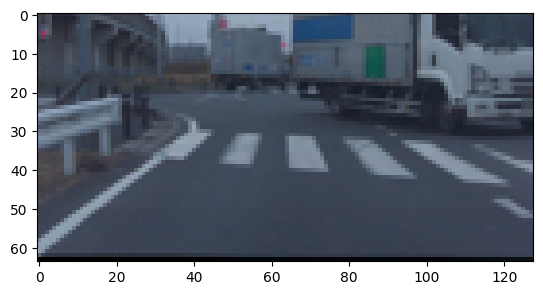

In [4]:
k = 1001
raw_image = Image.open(paths[k]).convert("RGB")
outputs = generator(raw_image)
plt.imshow(raw_image)

In [5]:
outputs

[{'score': 0.975707,
  'label': 'LABEL_191',
  'mask': <PIL.Image.Image image mode=L size=128x64>},
 {'score': 0.934795,
  'label': 'LABEL_197',
  'mask': <PIL.Image.Image image mode=L size=128x64>},
 {'score': 0.989467,
  'label': 'truck',
  'mask': <PIL.Image.Image image mode=L size=128x64>},
 {'score': 0.998309,
  'label': 'road',
  'mask': <PIL.Image.Image image mode=L size=128x64>},
 {'score': 0.948118,
  'label': 'LABEL_187',
  'mask': <PIL.Image.Image image mode=L size=128x64>}]

LABEL_191


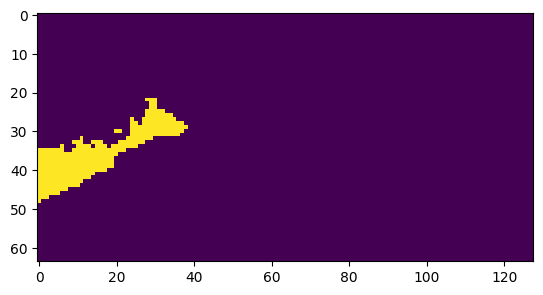

LABEL_197


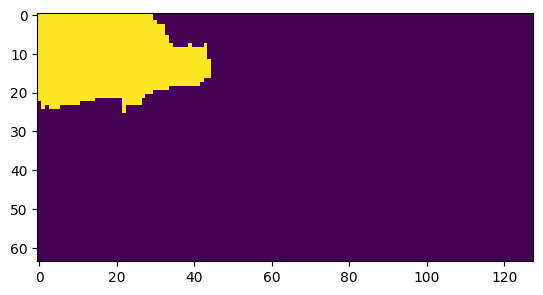

truck


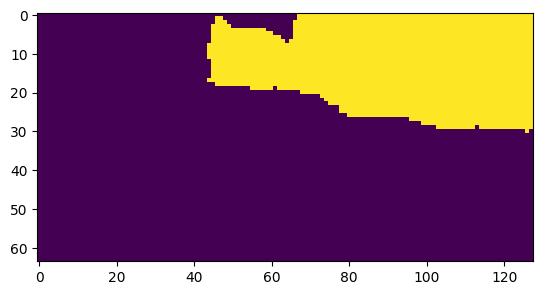

road


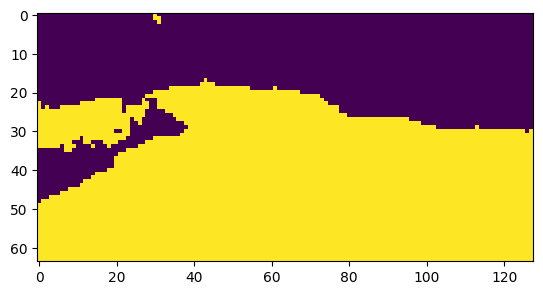

LABEL_187


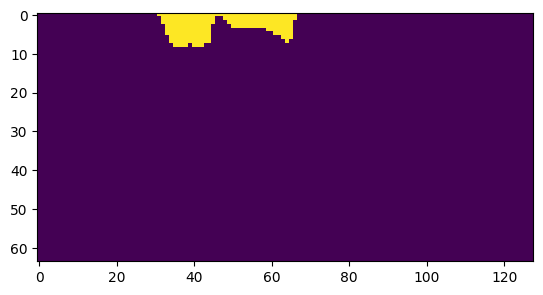

In [6]:
for o in outputs:
    print(o['label'])
    plt.imshow(o['mask'])
    plt.show()

In [7]:
import torch

In [8]:
from diffusers import StableDiffusionLatentUpscalePipeline
upscaler = StableDiffusionLatentUpscalePipeline.from_pretrained("stabilityai/sd-x2-latent-upscaler", torch_dtype=torch.float16)

generator = torch.manual_seed(33)

upscaler.to("cuda")
prompt = "an image captured by a camera mounted on a car."
upscaler = upscaler.to("cuda")

model_index.json:   0%|          | 0.00/408 [00:00<?, ?B/s]

Fetching 12 files:   0%|          | 0/12 [00:00<?, ?it/s]

unet/config.json:   0%|          | 0.00/1.23k [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/301 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/645 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/831 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/653 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/1.49G [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

In [10]:
# upscaled_image = upscaler(
#     prompt=prompt,
#     image=raw_image,
#     num_inference_steps=20,
#     guidance_scale=0,
#     generator=generator,
# ).images[0]

# # Let's save the upscaled image under "upscaled_astronaut.png"
# upscaled_image.save("astronaut_1024.png")

In [11]:
prompt = "an image captured by a camera mounted on a car."

In [13]:
upscaled_image

NameError: name 'upscaled_image' is not defined

In [ ]:
print('a')

In [31]:
# img_url = "https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/transformers/tasks/car.jpg"
from tqdm import tqdm
n = len(paths)
# 9000の結果
keys = {'road': 13903, 'LABEL_184': 6031, 'LABEL_197': 4468, 'LABEL_193': 2855, 'truck': 3261, 'car': 9665, 'LABEL_191': 2209, 'LABEL_187': 5782, 'person': 886, 'traffic light': 1239, 'LABEL_199': 1416, 'bus': 1119, 'LABEL_190': 8, 'LABEL_185': 586, 'LABEL_192': 160, 'house': 196, 'water-other': 2, 'tennis racket': 9, 'tv': 21, 'light': 48, 'LABEL_194': 159, 'train': 50, 'window-other': 51, 'chair': 14, 'bench': 138, 'sea': 15, 'bridge': 96, 'parking meter': 14, 'suitcase': 6, 'umbrella': 15, 'stop sign': 43, 'railroad': 19, 'airplane': 55, 'skateboard': 12, 'sports ball': 4, 'door-stuff': 53, 'motorcycle': 48, 'playingfield': 33, 'stairs': 11, 'wall-brick': 72, 'snow': 6, 'clock': 27, 'couch': 4, 'roof': 6, 'platform': 3, 'bicycle': 27, 'banner': 10, 'potted plant': 6, 'backpack': 14, 'horse': 1, 'baseball bat': 2, 'boat': 5, 'cat': 3, 'fire hydrant': 4, 'microwave': 1, 'shelf': 1, 'refrigerator': 3, 'gravel': 2, 'sink': 1, 'oven': 1, 'elephant': 3, 'handbag': 5, 'vase': 2, 'sand': 3, 'dog': 4, 'LABEL_198': 1, 'bed': 1, 'tent': 1, 'river': 1, 'LABEL_200': 2, 'LABEL_186': 1, 'wall-wood': 1, 'remote': 1, 'net': 1}

In [ ]:
for i, path in enumerate(tqdm(paths[9000:], total=n-9000)):
    raw_image = Image.open(path).convert("RGB")
    outputs = generator(raw_image)
    for o in outputs:
        label = o['label']
        if label not in keys:
            keys[label] = 0
        keys[label] += 1
    if i % 500 == 0:
        print('='*40 + str(i) + '='*40)
        print(keys)